In [1]:
# !pip install -r ../requirements.txt

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_palette("tab10")
plt.rcParams['lines.markersize'] = 0.5

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, Normalizer

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Homework 2

### The Dataset

### 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.


### (a) Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [3]:
df = pd.read_excel("..\data\Folds5x2_pp.xlsx",sheet_name="Sheet1",names=['temp','exhaust_vacuum','ambient_pressure','relative_humidity','energy_output'])

In [4]:
df.head()

,temp,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data:
#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [5]:
#shape
df.shape

(9568, 5)

The data has **9568** rows and **5** columns

- Rows represents **samples**.
- Columns [**temp, exhaust_vacuum, ambient_pressure, relative_humidity**] are the **features**.
- Column energy_output represents **target/response**.

#### ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

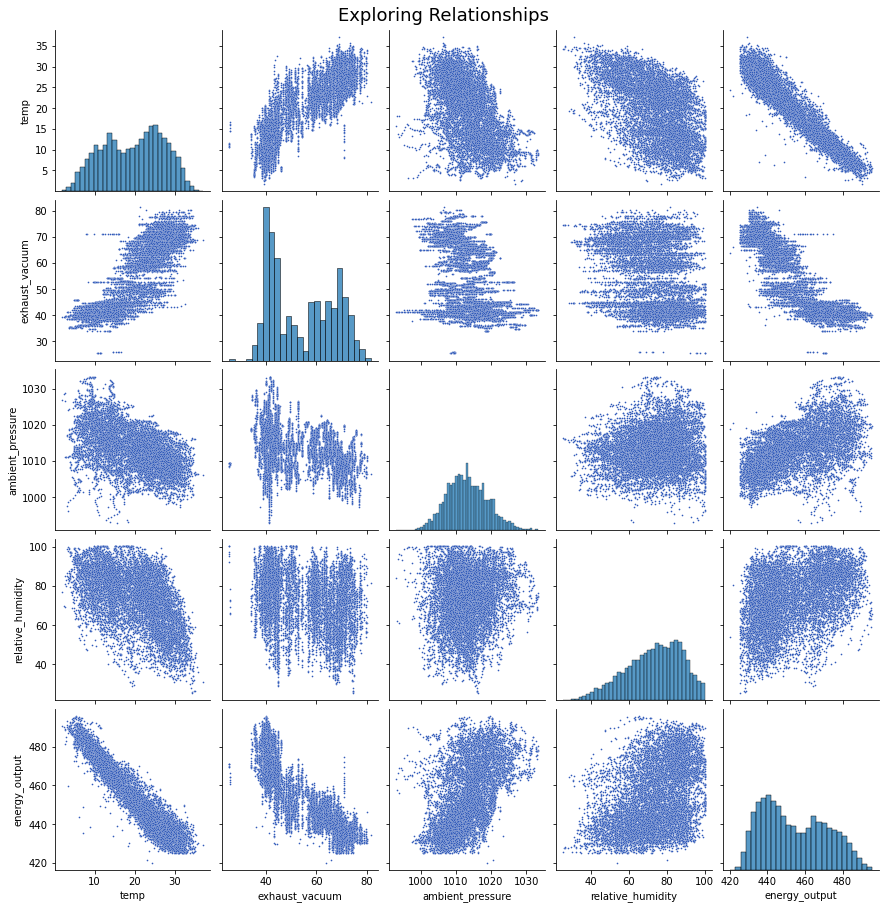

In [6]:
sns.pairplot(df,plot_kws={"s": 3,"c":["#325BBA"]})
plt.suptitle("Exploring Relationships",y=1.01,fontsize=18)
plt.show()

#### Observation:

- **Temperature** has a **good -ve linear** relationship with energy_output.
- **Exhaust vaccum** has a **good -ve non-linear** relationship with energy_output.
- **Ambient Pressure** shows a **very small amount of +ve linear** relationship with energy_output.
- **Relative Humidity** with energy_output is getting worse with no visible relationship.


#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
#Describing the data
Q1 = df.quantile(q=.25,axis=0)
Q3 = df.quantile(q=.75,axis=0)
        
desc = pd.DataFrame({
    'mean':df.mean(axis=0),
    'median':df.quantile(q=.50,axis=0),
    'range': df.max(axis=0) - df.min(axis=0),
    'Q1':Q1,
    'Q3':Q3,
    'IQR':Q3-Q1,  
})

desc

,mean,median,range,Q1,Q3,IQR
temp,19.651231,20.345,35.30,13.5100,25.72,12.2100
exhaust_vacuum,54.305804,52.080,56.20,41.7400,66.54,24.8000
ambient_pressure,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
relative_humidity,73.308978,74.975,74.60,63.3275,84.83,21.5025
energy_output,454.365009,451.550,75.50,439.7500,468.43,28.6800


#### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.
The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.

In [8]:
thresh = 4/df.shape[0]
print("4/n:",thresh)

4/n: 0.0004180602006688963


temp
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:52   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280    

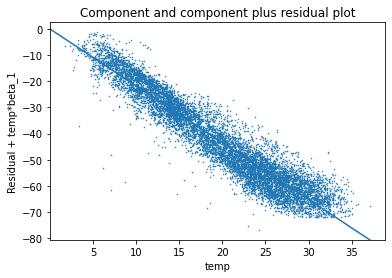

Number of outliers in temp: 416


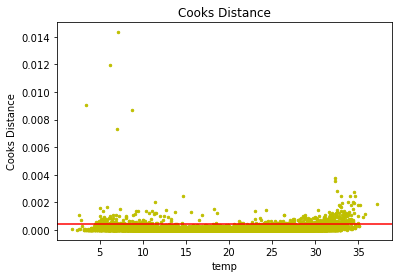



__________________________________________________________________________________________


exhaust_vacuum
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:52   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

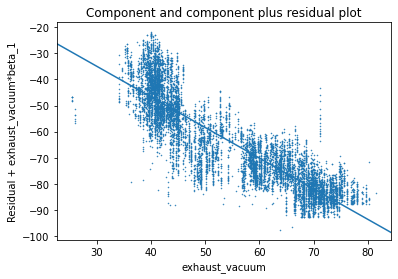

Number of outliers in exhaust_vacuum: 423


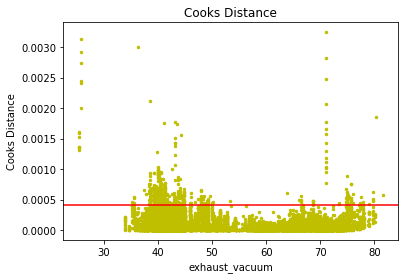



__________________________________________________________________________________________


ambient_pressure
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:52   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------

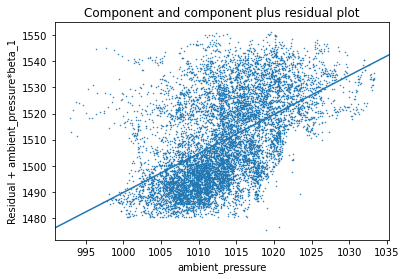

Number of outliers in ambient_pressure: 300


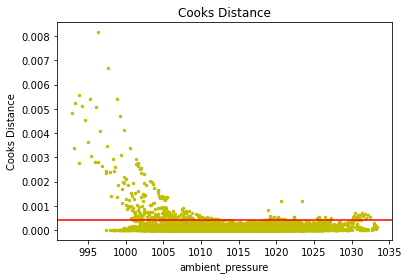



__________________________________________________________________________________________


relative_humidity
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:53   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------

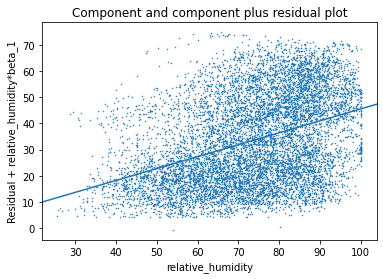

Number of outliers in relative_humidity: 249


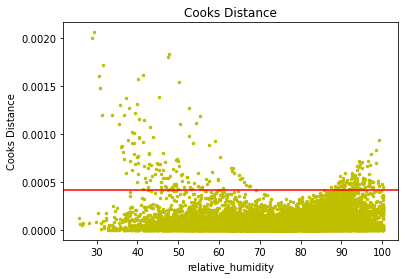



__________________________________________________________________________________________




In [9]:
params = []
# Ordinary Least Squares function
for col in df.columns[:-1]:
    
    print(col)
    mod = smf.ols(formula=f'energy_output ~ {col}',data = df).fit()
    print(mod.summary())
    
    params.append(mod.params[col])
    sm.graphics.plot_ccpr(mod,col)
    plt.show()
    
    #create instance of influence
    influence = mod.get_influence()
    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance
    
    print(f"Number of outliers in {col}:", (cooks[0]>thresh).sum())
    
    #Visualizing Cooks distance
    plt.scatter(df[col],cooks[0],c="y",s=6)
    plt.axhline(y=thresh, c="r")
    plt.xlabel(col)
    plt.ylabel("Cooks Distance")
    plt.title("Cooks Distance")
    plt.show()
    print("\n\n__________________________________________________________________________________________\n\n")

 In every model, the relationship between predictor and the response is **statistically significant.** And, **there are some outiers.**
 
- Cook’s distance is used to identify influential observations in a regression model.
- A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential.
- **Just because an observation is influential doesn’t necessarily mean that it should be deleted from the dataset.**

- Verification that the observation isn’t a result of a data entry error or some other odd occurrence is necessary.

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0?$

In [10]:
# Ordinary Least Squares function
mod1 = smf.ols(formula='energy_output ~ temp + exhaust_vacuum + ambient_pressure + relative_humidity',data = df).fit()
print(mod1.summary())    

                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:53   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           454.6093      9.74

As all predictors are statistically significant, thus, we can reject the null hypothesis: H0 : βj = 0

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

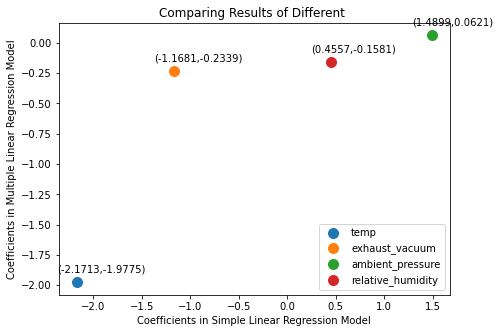

In [11]:
plt.figure(figsize=(7,5))
for i,j,k in zip(params,mod1.params[1:].values,df.columns[:-1]):
    plt.scatter(i,j,s=100,label=k)
    plt.annotate(f"({round(i,4)},{round(j,4)})", xy=(i,j), xytext=(-20, 10), textcoords='offset points')
    
plt.xlabel("Coefficients in Simple Linear Regression Model")
plt.ylabel("Coefficients in Multiple Linear Regression Model")
plt.title("Comparing Results of Different ")
plt.legend()
plt.show()

#### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X , fit a model of the form Y = $\beta0 + \beta1.X + \beta2.X^2 + \beta3.X^3 + \epsilon$

temp
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:53   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248    

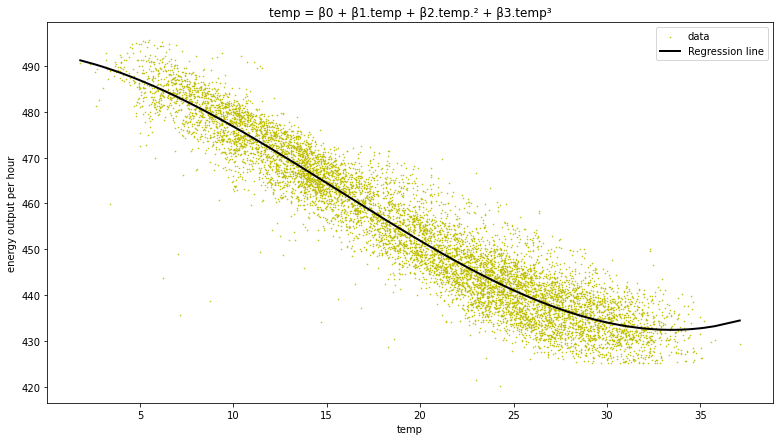



__________________________________________________________________________________________


exhaust_vacuum
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:54   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

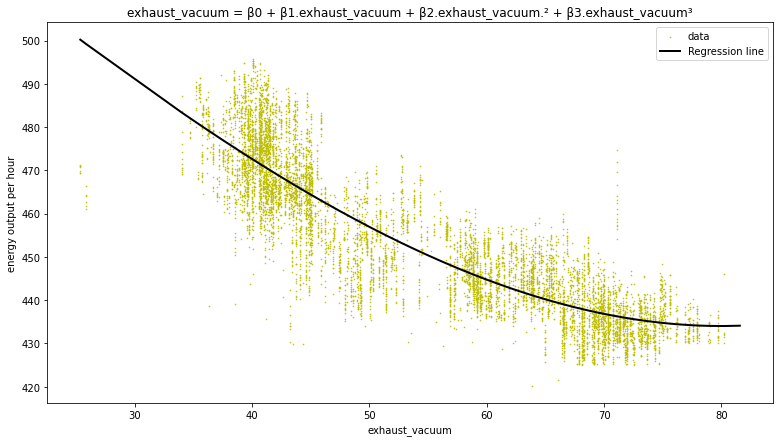



__________________________________________________________________________________________


ambient_pressure
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------

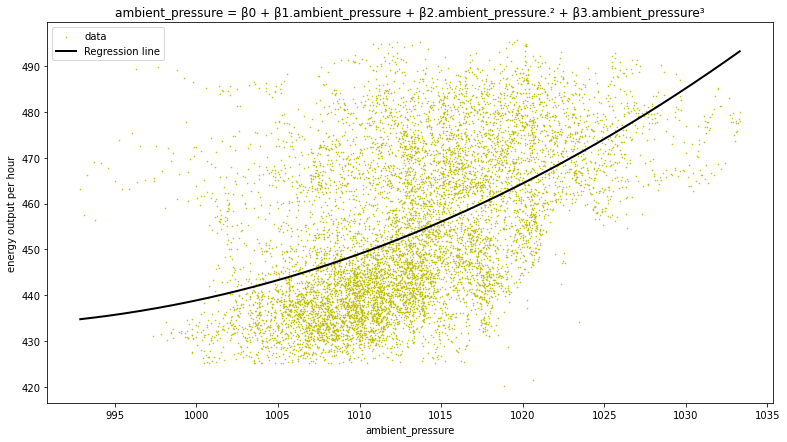



__________________________________________________________________________________________


relative_humidity
                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------

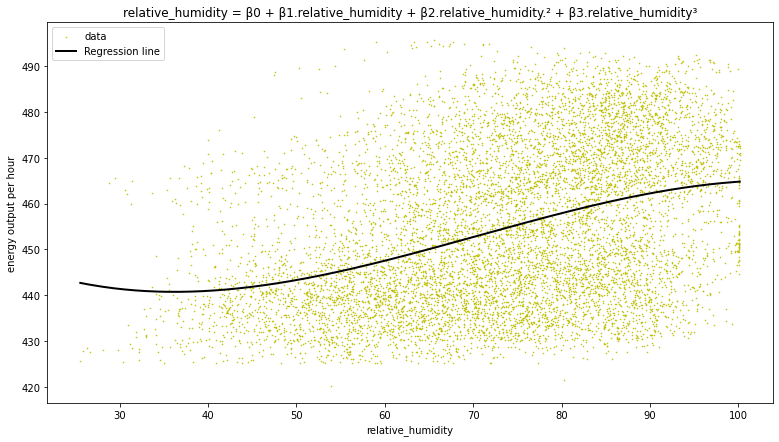



__________________________________________________________________________________________




In [12]:
poly_features = []
p = PolynomialFeatures(degree=3)
y = df['energy_output']
for i in df.columns[:-1]:
    print(i)
    new_x = pd.DataFrame(p.fit_transform(df[i].values.reshape(-1,1)),columns=['1',f'{i}',f'{i}2',f'{i}3'])
    new_df = pd.concat([new_x,y],axis=1)
    mod2 = smf.ols(formula=f'energy_output ~ 1 + {i} + {i}2 + {i}3',data = new_df).fit()
    print(mod2.summary())

    plt.figure(figsize=(13,7))
    plt.scatter(new_df[i],y,s=0.3,c='y',label="data")
    new_df['pred_y'] = mod2.predict(new_x)
    new_df.sort_values(by=i,inplace=True)
    plt.plot(new_df[i],new_df['pred_y'],'k',linewidth=2,label="Regression line")
    plt.title(f'{i} = \u03B20 + \u03B21.{i} + \u03B22.{i}.\u00b2 + \u03B23.{i}\u00b3')
    plt.xlabel(i)
    plt.ylabel("energy output per hour")
    plt.legend()
    plt.show()

    print("\n\n__________________________________________________________________________________________\n\n")
  

Yes, there is evidence for non-linear association between predictors and response. 

However, for exhaust vaccum, $V^2$ is not significant.

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [13]:
import itertools

interactions_df = df.copy()
interactions_df.columns = ["T","V","AP","RH","E"]
i=0
for cols,intrx in zip(list(itertools.combinations(df.columns[:-1], 2)),["T_V","T_AP","T_RH","V_AP","V_RH","AP_RH"]): 
    interactions_df.loc[:,intrx] = df[cols[0]]*df[cols[1]]
    i+=1   

In [14]:
interactions_df

,T,V,AP,RH,E,T_V,T_AP,T_RH,V_AP,V_RH,AP_RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [15]:
mod3 = smf.ols(formula=f'E ~ 1 + T + V + AP + RH + T_V + T_AP + T_RH + V_AP + V_RH + AP_RH',data = interactions_df).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#### Given $\alpha = 0.05$, statistically significant interaction terms are:

- **T_V**: Temperature(T) and Exhaust Volume(V)
- **T_RH**: Temperature(T) and Relative Humidity(RH)
- **V_AP**: Volume(V) and Ambient Pressure(AP)
- **AP_RH**: Ambient Pressure(AP) and Relative Humidity(RH)

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 

#### Train the regression model on a randomly selected 70% subset of the data with all predictors. 

In [16]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop('energy_output',axis=1),df['energy_output'],test_size=0.3,random_state = 0)

In [17]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)
mod4 = sm.OLS(endog = ytrain, exog = Xtrain).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               448.5613     11.74

In [18]:
ytest_pred = mod4.predict(Xtest)
ytrain_pred = mod4.predict(Xtrain)
r2_lr1 = r2_score(ytest,ytest_pred)
print("R2 Score: ",r2_lr1)
print("MSE Test Data: ",mean_squared_error(ytest,ytest_pred))
print("MSE Train Data: ",mean_squared_error(ytrain,ytrain_pred))

R2 Score:  0.9304112159477682
MSE Test Data:  20.36838300288593
MSE Train Data:  20.9415636167396


#### Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [19]:
int_quad = interactions_df.copy()
for quad_col,col in zip(['T2','V2','AP2','RH2'],['T','V','AP','RH']):
    int_quad[quad_col] = int_quad[col]**2
    
int_quad.head()

,T,V,AP,RH,E,T_V,T_AP,T_RH,V_AP,V_RH,AP_RH,T2,V2,AP2,RH2
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1406.2500,1.018545e+06,9335.4244


In [20]:
Xtrain,Xtest,ytrain,ytest = train_test_split(int_quad.drop('E',axis=1),int_quad['E'],test_size=0.3,random_state = 0)

In [21]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)
mod5 = sm.OLS(endog = ytrain,exog = Xtrain).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.0

In [22]:
ytest_pred = mod5.predict(Xtest)
ytrain_pred = mod5.predict(Xtrain)
r2_lr2 = r2_score(ytest,ytest_pred)
print("R2 Score: ",r2_lr2)
print("MSE Test Data: ",mean_squared_error(ytest,ytest_pred))
print("MSE Train Data: ",mean_squared_error(ytrain,ytrain_pred))

R2 Score:  0.9401421948886421
MSE Test Data:  17.52016099757009
MSE Train Data:  18.366012211970816


#### Droping T_AP, V_AP, V_RH and $V^2$

PIAZZA: In general, We only remove a variable if it is insignificant. **If the variable is insignificant but its polynomials or interaction terms are significant, then we do retain the variable.**  Atleast that according to the principle of heirarchy. 
<!-- But i also, remember the professor saying that the principle is quite ad-hoc. So it depends.  -->

In [23]:
Xtrain,Xtest,ytrain,ytest = train_test_split(int_quad.drop(['T_AP','V_AP','V_RH','V2','E'],axis=1),int_quad['E'],test_size=0.3,random_state = 0)

In [24]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)
mod6 = sm.OLS(endog = ytrain,exog = Xtrain).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:56   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e+04   1121.577     -8.921      0.0

In [25]:
ytest_pred = mod6.predict(Xtest)
ytrain_pred = mod6.predict(Xtrain)
print("MSE Test Data: ",mean_squared_error(ytest,ytest_pred))
print("MSE Train Data: ",mean_squared_error(ytrain,ytrain_pred))
r2_lr3 = r2_score(ytest,ytest_pred)
print("R2 Score: ",r2_lr3)

MSE Test Data:  17.565669596508602
MSE Train Data:  18.39935579904259
R2 Score:  0.9399867143056424


#### (i) KNN Regression: Perform k -nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1 , 2 , . . . , 100 } that gives you the best fit. Plot the train and test errors in terms of 1 /k .

In [26]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop('energy_output',axis=1),df['energy_output'],test_size=0.3,random_state = 0)

In [27]:
k = np.arange(1,101,1)
train_errors,test_errors = [],[]
min_err = np.inf
bestk = np.inf

for kval in k:
    knn = KNeighborsRegressor(n_neighbors=kval)
    knn.fit(Xtrain,ytrain)
    ytrain_pred = knn.predict(Xtrain)
    ytest_pred = knn.predict(Xtest)
    test_error = mean_squared_error(ytest,ytest_pred)
    
    if test_error < min_err:
        min_err = test_error
        bestk = kval
    
    train_errors.append(mean_squared_error(ytrain,ytrain_pred))
    test_errors.append(test_error)

In [28]:
print("MSE:",min_err)
print("Best k:",bestk)

MSE: 15.6635051689307
Best k: 5


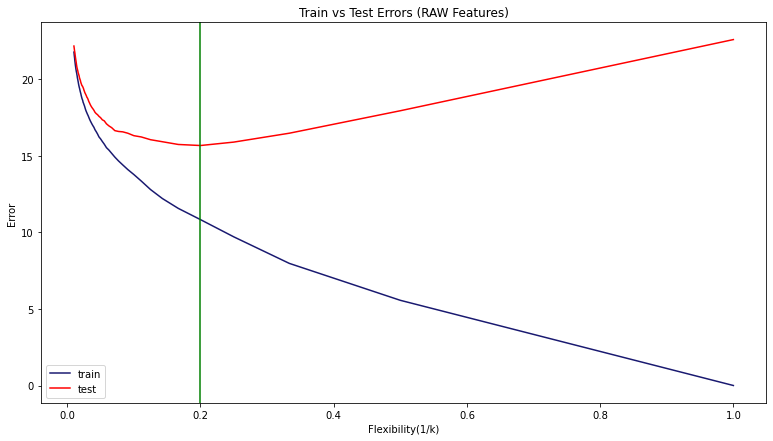

In [29]:
'''Plots train and test errors for different k'''
plt.figure(figsize=(13,7))
plt.plot(1/k,train_errors,'midnightblue',label="train")
plt.plot(1/k,test_errors,'r',label="test")
plt.axvline((1/k)[np.argmin(test_errors)],c='g',ls='-')
plt.xlabel("Flexibility(1/k)")
plt.ylabel("Error")
plt.title("Train vs Test Errors (RAW Features)")
plt.legend()
plt.show()

### Normalized Data - Min Max Scalar - Normalizing Features

In [30]:
n = MinMaxScaler()
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop('energy_output',axis=1),df['energy_output'],test_size=0.3,random_state = 0)

n.fit(Xtrain)
Xtrain = n.transform(Xtrain)
Xtest = n.transform(Xtest)

k = np.arange(1,101,1)
train_errors,test_errors = [],[]
min_err = np.inf
bestk = np.inf
r2_knn = 0

for kval in k:
    knn = KNeighborsRegressor(n_neighbors=kval)
    knn.fit(Xtrain,ytrain)
    ytrain_pred = knn.predict(Xtrain)
    ytest_pred = knn.predict(Xtest)
    test_error = mean_squared_error(ytest,ytest_pred)
    if test_error < min_err:
        min_err = test_error
        bestk = kval
        r2_knn = r2_score(ytest,ytest_pred)
        
    train_errors.append(mean_squared_error(ytrain,ytrain_pred))
    test_errors.append(test_error)

In [31]:
print("MSE:",min_err)
print("Best k:",bestk)

MSE: 13.938621450133523
Best k: 6


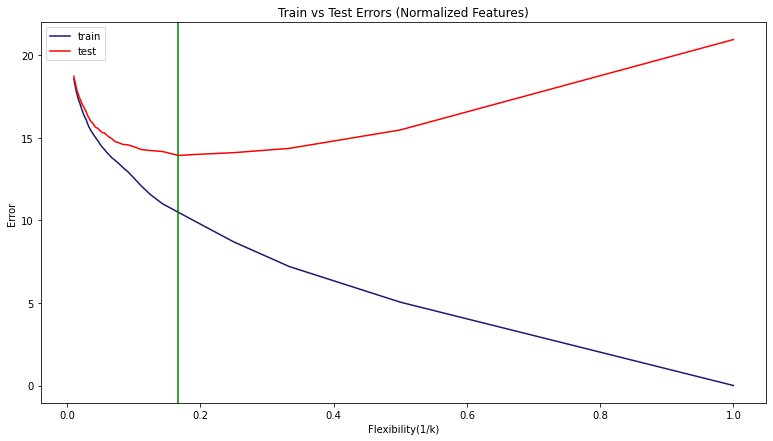

In [32]:
'''Plots train and test errors for different k'''
plt.figure(figsize=(13,7))
plt.plot(1/k,train_errors,'midnightblue',label="train")
plt.plot(1/k,test_errors,'r',label="test")
plt.axvline((1/k)[np.argmin(test_errors)],c='g',ls='-')
plt.xlabel("Flexibility(1/k)")
plt.ylabel("Error")
plt.title("Train vs Test Errors (Normalized Features)")
plt.legend()
plt.show()

#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [36]:
print("KNN Regression(R2 Score) Min-max Feature Normalization:", r2_knn)

KNN Regression(R2 Score) Min-max Feature Normalization: 0.9523785605395522


In [37]:
print("Linear Regression(R2 Score):",min(r2_lr1,r2_lr2,r2_lr3))

Linear Regression(R2 Score): 0.9304112159477682


#### Here, KNN Regression with normalized features perform better than linear regression. 

KNN is better than linear regression in this case because we have sufficient number of observations and the number of features(p) is small. As KNN is more conservative, we get slightly better results than Linear Regression.


## ISLR 2.4.1 & ISLR 2.4.7

Please refer the PDF or images in the current folder.

<img src="ISLR1.jpg" width="500"/>

<img src="ISLR2.jpg" width="500"/>

<img src="ISLR3.jpg" width="500"/>

### References:

- <a href="https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a">Interpreting Linear Regression Through statsmodels .summary()</a>
- <a href="https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html">Regression Plots</a>
- <a href="https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/">Should You Normalize and Encode Data Before Train-Test Splitting, or After Splitting?</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>
- <a href="https://www.statology.org/cooks-distance-python/">Cooks Distance</a>